In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import impute 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Copy of Consumer creditworthiness train data.xlsx")

In [ ]:
df.shape

(521, 13)

In [ ]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
502,608884,Male,Yes,2,Graduate,No,1094625,1265400.0,416000,360.0,1.0,Semiurban,Y
232,343581,Male,No,0,Not Graduate,No,717525,584550.0,240000,NaN,1.0,Rural,Y
499,139130,Male,No,0,Graduate,No,1413675,993600.0,418000,360.0,0.0,Rural,N
151,597694,Male,Yes,0,Graduate,Yes,579825,843750.0,304000,360.0,1.0,Rural,Y
261,250606,Male,No,0,Graduate,No,463500,497025.0,268000,360.0,1.0,Semiurban,Y
269,825042,Female,No,1,Graduate,No,647100,351000.0,180000,360.0,1.0,Urban,Y
181,647566,Male,No,0,Graduate,No,431100,1139175.0,134000,360.0,NaN,Rural,N
169,643209,Male,Yes,2,Graduate,No,1800000,0.0,400000,360.0,1.0,Semiurban,Y
349,112377,Male,Yes,0,Graduate,No,590625,1406250.0,374000,360.0,1.0,Rural,Y
203,503327,Male,Yes,1,Not Graduate,No,787500,243675.0,270000,360.0,1.0,Urban,Y


#### Null values in the original Dataset 

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   507 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


#### Data Visulisation

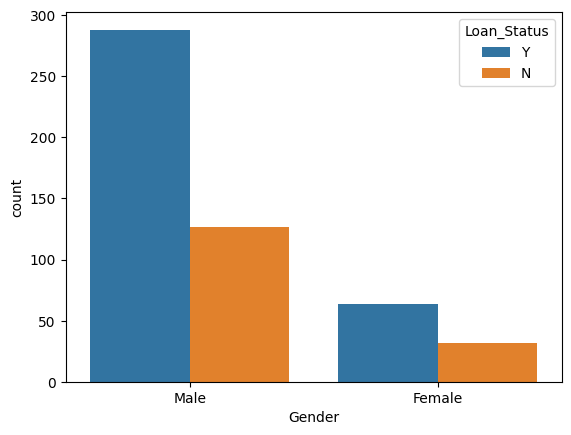

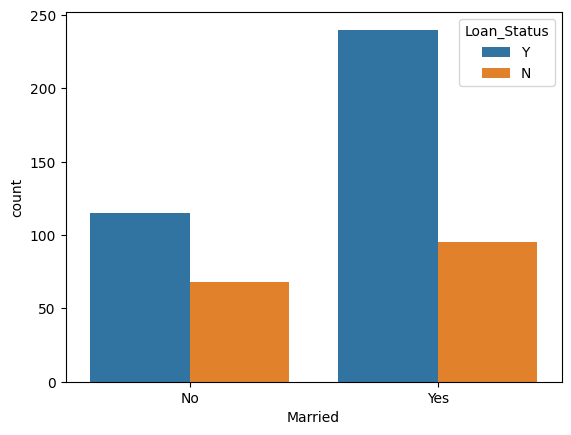

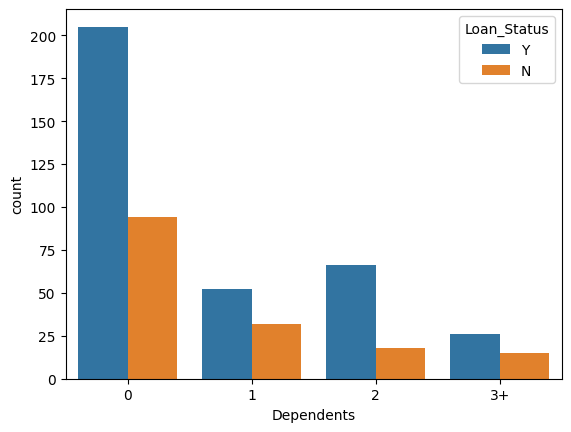

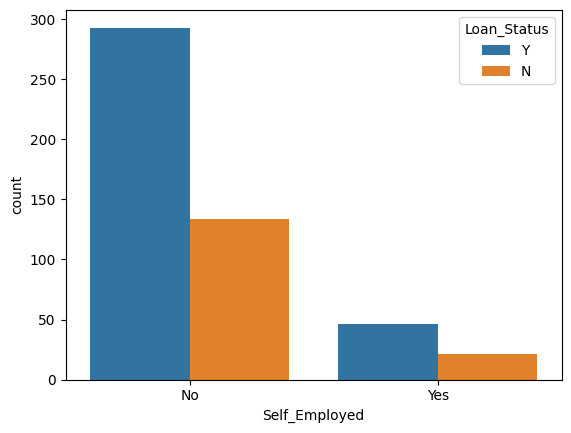

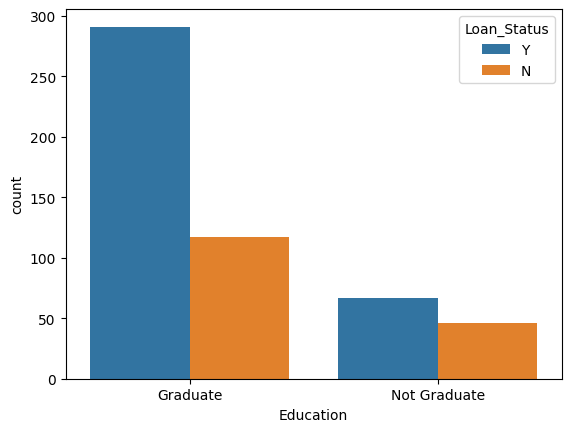

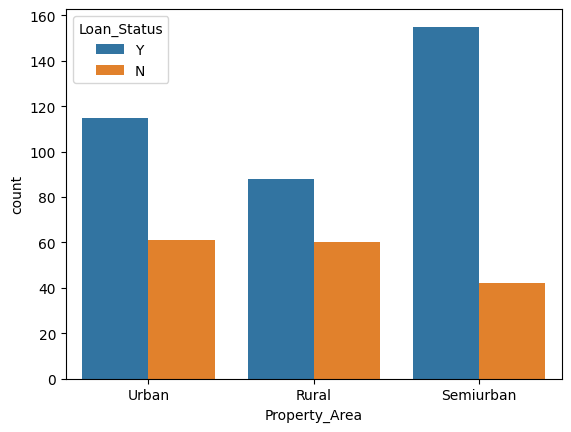

In [ ]:
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Education','Property_Area']:
    sns.countplot(x=column, data=df,hue= df.Loan_Status)
    plt.show()

#### Data Distribution 

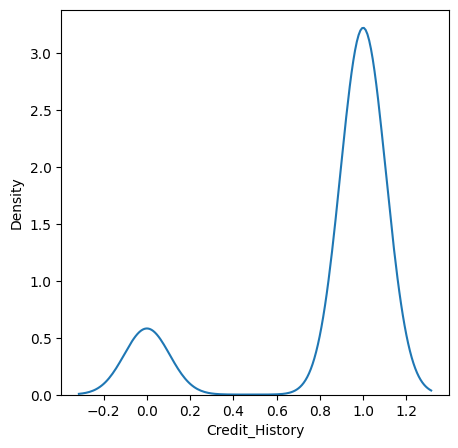

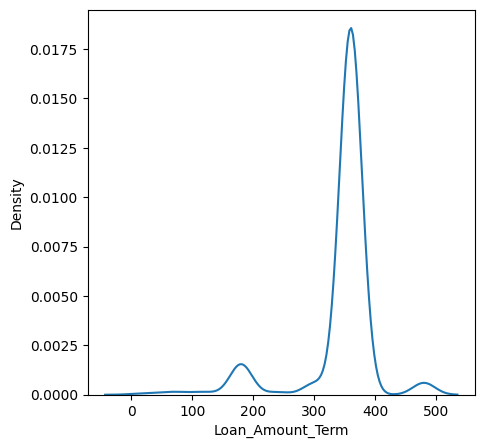

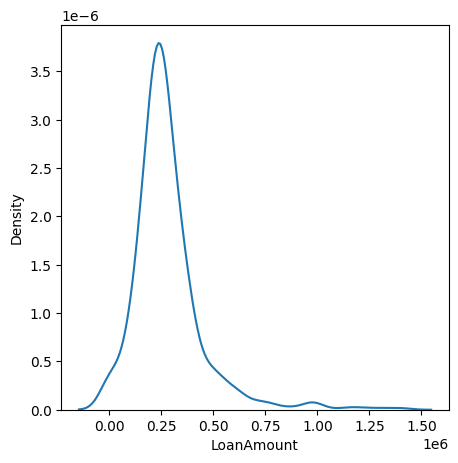

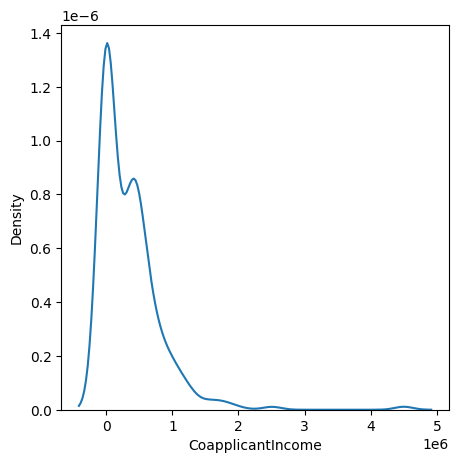

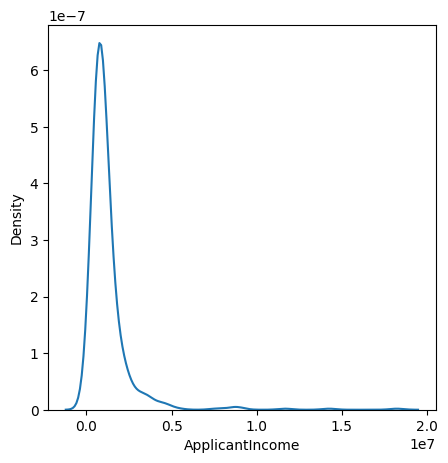

In [ ]:
import seaborn as sns
col = ['Credit_History','Loan_Amount_Term','LoanAmount','CoapplicantIncome','ApplicantIncome']
for i in col :
  plt.figure(figsize=(5,5))
  sns.kdeplot(df[i])
  plt.show()

#### Correlation of Numerical columns  :

<ipython-input-75-62cf6bb81368>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  w = df[['Loan_ID',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History',	'Loan_Status']].corr()


<Axes: >

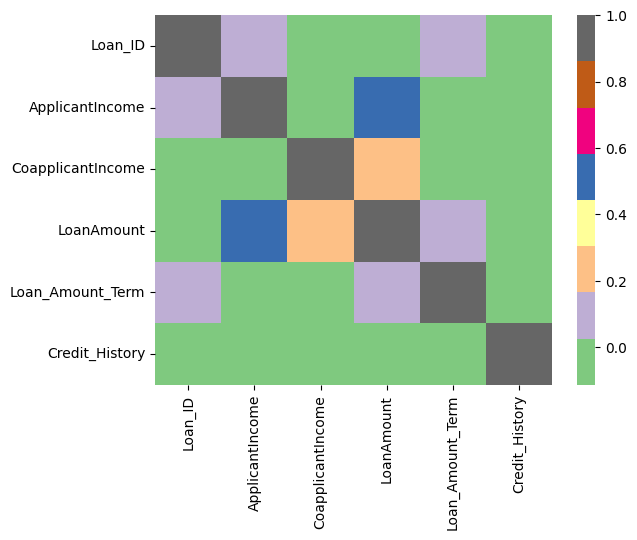

In [ ]:
w = df[['Loan_ID',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History',	'Loan_Status']].corr()
sns.heatmap(w,cmap='Accent')

#### Label Encoding for target variable 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the target variable
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

# The transformed target variable is now a numerical array
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,1
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,0
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,1
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,1
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,947032,Female,Yes,2,Graduate,No,456975,367200.0,226000,480.0,1.0,Semiurban,1
517,756833,Male,Yes,NaN,Not Graduate,No,691650,405000.0,246000,360.0,0.0,Semiurban,0
518,395763,Male,No,0,Graduate,No,1053675,430875.0,370000,360.0,1.0,Semiurban,0
519,158946,Female,No,0,Not Graduate,No,765000,0.0,190000,360.0,1.0,Rural,0


In [ ]:
clmns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Education','Property_Area']
for i in clmns:
        s = df[[i,'Loan_Status']].groupby([i]).mean()
        print(s)
        print("*********************")

        Loan_Status
Gender             
Female     0.666667
Male       0.693976
*********************
         Loan_Status
Married             
No          0.628415
Yes         0.716418
*********************
            Loan_Status
Dependents             
0              0.685619
1              0.619048
2              0.785714
3+             0.634146
*********************
               Loan_Status
Self_Employed             
No                0.686183
Yes               0.686567
*********************
              Loan_Status
Education                
Graduate         0.713235
Not Graduate     0.592920
*********************
               Loan_Status
Property_Area             
Rural             0.594595
Semiurban         0.786802
Urban             0.653409
*********************


### Hypothesis Testing 

#### Chi2 test  
- Dependency of Target columns with categorical columns

In [ ]:
from scipy.stats import chi2_contingency
import scipy



def chi2_test(col):
    cont_table = pd.crosstab(df['Loan_Status'], df[col])

    chi2, p_value, dof, expected = chi2_contingency(cont_table)
    print(col)
    print("Chi-Squared Statistic: ", chi2)
    print("P-value: ", p_value)
    print("Degrees of Freedom: ", dof)
    if p_value > 0.05:
      print("We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns")
    else:
      print("We Fail to accept the Null Hypothesis, hence there is a dependency between the two columns")
   
    print('*'*30)

for i in ['Gender','Married','Self_Employed']:
    chi2_test(i)

Gender
Chi-Squared Statistic:  0.1588291701997739
P-value:  0.6902367665572007
Degrees of Freedom:  1
We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns
******************************
Married
Chi-Squared Statistic:  3.8518373108048656
P-value:  0.04969152864604632
Degrees of Freedom:  1
We Fail to accept the Null Hypothesis, hence there is a dependency between the two columns
******************************
Self_Employed
Chi-Squared Statistic:  0.0
P-value:  1.0
Degrees of Freedom:  1
We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns
******************************


#### Spearman correlation 
- WE ARE GOING TO USE SPEARMAN CORRELATION BECUASE THE NUMERICAL COLUMNS ARE NOT NORMALLY DISTRIBUTED


In [ ]:
data1 = df.dropna().copy()
data1['Dependents']= data1.Dependents.apply(lambda x:x.replace('+','') if '+' in str(x) else x)
data1['Dependents']= data1['Dependents'].apply(lambda x:int(x) if pd.notna(x) else x)
def spearman_corr(i):
  corr, p_value = scipy.stats.spearmanr(data1['Loan_Status'], data1[i])
  print(i)
  print("Spearman correlation: ", corr)
  print("P-value: ", p_value)
  if p_value > 0.05:
    print("We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns")
  else:
    print("We Fail to accept the Null Hypothesis, hence there is a dependency between the two columns")
   
  print('*'*30)

col = ['Credit_History','Loan_Amount_Term','LoanAmount','CoapplicantIncome','ApplicantIncome']
for i in col:
  spearman_corr(i)

Credit_History
Spearman correlation:  0.5126730402891172
P-value:  1.1644804763493855e-29
We Fail to accept the Null Hypothesis, hence there is a dependency between the two columns
******************************
Loan_Amount_Term
Spearman correlation:  -0.011315548197751962
P-value:  0.8167173139790557
We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns
******************************
LoanAmount
Spearman correlation:  -0.03324052721037596
P-value:  0.495864570968479
We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns
******************************
CoapplicantIncome
Spearman correlation:  0.04795331345330105
P-value:  0.32573978410962456
We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns
******************************
ApplicantIncome
Spearman correlation:  -0.03202843429655392
P-value:  0.5117177411790734
We Fail to reject the Null Hypothesis, hence there is NO dependen

#### Kendall Tau Test 
- Dependency of Ordinal Columns

In [ ]:
def kendall_tau_test(col):
    corr, p_value = scipy.stats.kendalltau(data1['Loan_Status'], data1[col])
    print(col)
    print("Kendall Tau correlation: ", corr)
    print("P-value: ", p_value)
    if p_value > 0.05:
      print("We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns")
    else:
      print("We Fail to accept the Null Hypothesis, hence there is a dependency between the two columns")
   
    print('*'*30)

for i in ['Education','Property_Area','Dependents']:
    kendall_tau_test(i)

Education
Kendall Tau correlation:  -0.0900192761740047
P-value:  0.06474118071017233
We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns
******************************
Property_Area
Kendall Tau correlation:  0.013387764231923853
P-value:  0.7710341089097569
We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns
******************************
Dependents
Kendall Tau correlation:  0.020893245291860655
P-value:  0.6484548134376591
We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns
******************************


#### Observations
- SELF EMPLOYED AND GENDER CAN BE DROPPED AS THE TWO ARE HAVING EQUAL CHANCES OF BEING APPROVED OF THE LOAN
- LOAN ID COLUMN CAN BE DROPPED
- CREDIT HISTORY HAS CORRELATION WITH LOAN STATUS (USING SPEARMAN CORRELATION)
- MARITAL STATUS HAS CORRELATION WITH LOAN STATUS (CHI2 TEST) 
- APPLICANTS INCOME AND LOAN AMOUNT ARE HIGHLY CORRELATED 
- CO APPLICANTS INCOME AND LOAN AMOUNT HAS LESS CORRELATED HENCE IT CAN BE DROPPED



#### Simple Imputer to for mean and mode imputation in various columns to get rid of missing values 

In [ ]:
# create SimpleImputer object for mean imputation
mean_imputer = SimpleImputer(strategy='mean')

# create SimpleImputer object for mode imputation
mode_imputer = SimpleImputer(strategy='most_frequent')

# select columns to impute using mean
mean_columns = ['Loan_Amount_Term', 'Credit_History']

# select columns to impute using mode
mode_columns = ['Gender','Married','Dependents','Self_Employed']

# fit and transform mean imputer on mean_columns
df_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(df[mean_columns]), columns=mean_columns).reset_index(drop=True)

# fit and transform mode imputer on mode_columns
df_mode_imputed = pd.DataFrame(mode_imputer.fit_transform(df[mode_columns]), columns=mode_columns).reset_index(drop=True)

df_remainder = df[['Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Property_Area','Loan_Status']].reset_index(drop=True)

# concatenate the two DataFrames
df_imputed = pd.concat([df_mean_imputed, df_mode_imputed, df_remainder], axis=1)

# print the imputed DataFrame
data = pd.DataFrame(df_imputed)
data

,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Self_Employed,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,360.0,1.0,Male,No,0,No,Graduate,1316025,0.0,250000,Urban,1
1,360.0,1.0,Male,Yes,1,No,Graduate,1031175,339300.0,256000,Rural,0
2,360.0,1.0,Male,Yes,0,Yes,Graduate,675000,0.0,132000,Urban,1
3,360.0,1.0,Male,Yes,0,No,Not Graduate,581175,530550.0,240000,Urban,1
4,360.0,1.0,Male,No,0,No,Graduate,1350000,0.0,282000,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
516,480.0,1.0,Female,Yes,2,No,Graduate,456975,367200.0,226000,Semiurban,1
517,360.0,0.0,Male,Yes,0,No,Not Graduate,691650,405000.0,246000,Semiurban,0
518,360.0,1.0,Male,No,0,No,Graduate,1053675,430875.0,370000,Semiurban,0
519,360.0,1.0,Female,No,0,No,Not Graduate,765000,0.0,190000,Rural,0


In [ ]:
data = data.reindex(columns = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'])
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
516,Female,Yes,2,Graduate,No,456975,367200.0,226000,480.0,1.0,Semiurban,1
517,Male,Yes,0,Not Graduate,No,691650,405000.0,246000,360.0,0.0,Semiurban,0
518,Male,No,0,Graduate,No,1053675,430875.0,370000,360.0,1.0,Semiurban,0
519,Female,No,0,Not Graduate,No,765000,0.0,190000,360.0,1.0,Rural,0


#### Creation of new columns 
- total income from applicants and co applicants income
- Creating bins for checking dependency for Loan Amount Term and Total Income 
 

In [ ]:
data['Total_Income']= data['ApplicantIncome'] + data['CoapplicantIncome']
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,1,1316025.0
1,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,0,1370475.0
2,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,1,675000.0
3,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,1,1111725.0
4,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,1,1350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Female,Yes,2,Graduate,No,456975,367200.0,226000,480.0,1.0,Semiurban,1,824175.0
517,Male,Yes,0,Not Graduate,No,691650,405000.0,246000,360.0,0.0,Semiurban,0,1096650.0
518,Male,No,0,Graduate,No,1053675,430875.0,370000,360.0,1.0,Semiurban,0,1484550.0
519,Female,No,0,Not Graduate,No,765000,0.0,190000,360.0,1.0,Rural,0,765000.0


In [ ]:
bins = [0, 100000, 500000, 1000000, 2000000, 3000000,10000001000000]
data['binned'] = np.searchsorted(bins ,data['Total_Income'].values)
data['binned_Applicants_Income'] = np.searchsorted(bins ,data['ApplicantIncome'].values)
data['binned_coapplicants_Income'] = np.searchsorted(bins ,data['CoapplicantIncome'].values)

In [ ]:
bins = [0,121,181,241,300,361,1000000]
data['binned_loan_amount'] = np.searchsorted(bins ,data['Loan_Amount_Term'].values)

In [ ]:
data[['binned_loan_amount','binned','Loan_Status','binned_Applicants_Income','binned_coapplicants_Income']].corr()

,binned_loan_amount,binned,Loan_Status,binned_Applicants_Income,binned_coapplicants_Income
binned_loan_amount,1.000000,-0.013384,-0.042164,-0.044411,0.034480
binned,-0.013384,1.000000,-0.007796,0.774161,0.251784
Loan_Status,-0.042164,-0.007796,1.000000,-0.020427,0.051366
binned_Applicants_Income,-0.044411,0.774161,-0.020427,1.000000,-0.283814
binned_coapplicants_Income,0.034480,0.251784,0.051366,-0.283814,1.000000


In [ ]:
def kendall_tau_test(col):
    corr, p_value = scipy.stats.kendalltau(data['Loan_Status'], data[col])
    print(col)
    print("Kendall Tau correlation: ", corr)
    print("P-value: ", p_value)
    if p_value > 0.05:
      print("We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns")
    else:
      print("We Fail to accept the Null Hypothesis, hence there is a dependency between the two columns")
   
    print('*'*30)
for i in ['binned','binned_loan_amount']: 
 kendall_tau_test(i)

binned
Kendall Tau correlation:  -0.0019854161060465607
P-value:  0.9615025102884829
We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns
******************************
binned_loan_amount
Kendall Tau correlation:  -0.05103211409112397
P-value:  0.2329777764904981
We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns
******************************


In [ ]:
def chi2_test(col):
    cont_table = pd.crosstab(data['Loan_Status'], data[col])

    chi2, p_value, dof, expected = chi2_contingency(cont_table)
    print(col)
    print("Chi-Squared Statistic: ", chi2)
    print("P-value: ", p_value)
    print("Degrees of Freedom: ", dof)
    if p_value > 0.05:
      print("We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns")
    else:
      print("We Fail to accept the Null Hypothesis, hence there is a dependency between the two columns")
   
    print('*'*30)

for i in ['binned','binned_loan_amount']:
  chi2_test(i)

binned
Chi-Squared Statistic:  9.405070633275233
P-value:  0.051734808354765856
Degrees of Freedom:  4
We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns
******************************
binned_loan_amount
Chi-Squared Statistic:  7.8724821782095455
P-value:  0.16340482548446206
Degrees of Freedom:  5
We Fail to reject the Null Hypothesis, hence there is NO dependency between the two columns
******************************


In [ ]:
data[['binned','Total_Income','binned_loan_amount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term',"Loan_Status"]].corr()


,binned,Total_Income,binned_loan_amount,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Loan_Status
binned,1.000000,0.706314,-0.013384,0.598991,0.359470,-0.018859,-0.007796
Total_Income,0.706314,1.000000,-0.070079,0.945730,0.215406,-0.067674,-0.023780
binned_loan_amount,-0.013384,-0.070079,1.000000,-0.075619,0.012983,0.982774,-0.042164
ApplicantIncome,0.598991,0.945730,-0.075619,1.000000,-0.113610,-0.069810,-0.022277
CoapplicantIncome,0.359470,0.215406,0.012983,-0.113610,1.000000,0.002878,-0.005760
Loan_Amount_Term,-0.018859,-0.067674,0.982774,-0.069810,0.002878,1.000000,-0.053042
Loan_Status,-0.007796,-0.023780,-0.042164,-0.022277,-0.005760,-0.053042,1.000000


#### OBSERVATION
- THE NEWLY CREATED TOTAL INCOME IS HAVING CORRELATION NEAR TO 0 WITH LOAN STATUS SO IT CAN BE DROPPED 

#### Columntransformer of the dataset 

In [ ]:
# Transforming the dependets column of the train data set 
data['Dependents']= data.Dependents.apply(lambda x:x.replace('+','') if '+' in str(x) else x)
data['Dependents']= data['Dependents'].apply(lambda x:int(x) if pd.notna(x) else x)

In [ ]:
transformer = ColumnTransformer(transformers = [
    ('t1',OneHotEncoder(dtype='int',sparse_output = False, drop = 'first'),['Gender','Married','Self_Employed']),
    ('t2',OrdinalEncoder(dtype='int',categories=[['Rural','Semiurban','Urban'],['Not Graduate','Graduate']]),['Property_Area','Education']),
    ]
  ,remainder = 'passthrough')

In [ ]:
df1 = transformer.fit_transform(data)
feature_names = transformer.get_feature_names_out()
df_transformed = pd.DataFrame(df1, columns=feature_names)
df_transformed

,t1__Gender_Male,t1__Married_Yes,t1__Self_Employed_Yes,t2__Property_Area,t2__Education,remainder__Dependents,remainder__ApplicantIncome,remainder__CoapplicantIncome,remainder__LoanAmount,remainder__Loan_Amount_Term,remainder__Credit_History,remainder__Loan_Status,remainder__Total_Income,remainder__binned,remainder__binned_Applicants_Income,remainder__binned_coapplicants_Income,remainder__binned_loan_amount
0,1.0,0.0,0.0,2.0,1.0,0.0,1316025.0,0.0,250000.0,360.0,1.0,1.0,1316025.0,4.0,4.0,0.0,5.0
1,1.0,1.0,0.0,0.0,1.0,1.0,1031175.0,339300.0,256000.0,360.0,1.0,0.0,1370475.0,4.0,4.0,2.0,5.0
2,1.0,1.0,1.0,2.0,1.0,0.0,675000.0,0.0,132000.0,360.0,1.0,1.0,675000.0,3.0,3.0,0.0,5.0
3,1.0,1.0,0.0,2.0,0.0,0.0,581175.0,530550.0,240000.0,360.0,1.0,1.0,1111725.0,4.0,3.0,3.0,5.0
4,1.0,0.0,0.0,2.0,1.0,0.0,1350000.0,0.0,282000.0,360.0,1.0,1.0,1350000.0,4.0,4.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,0.0,1.0,0.0,1.0,1.0,2.0,456975.0,367200.0,226000.0,480.0,1.0,1.0,824175.0,3.0,2.0,2.0,6.0
517,1.0,1.0,0.0,1.0,0.0,0.0,691650.0,405000.0,246000.0,360.0,0.0,0.0,1096650.0,4.0,3.0,2.0,5.0
518,1.0,0.0,0.0,1.0,1.0,0.0,1053675.0,430875.0,370000.0,360.0,1.0,0.0,1484550.0,4.0,4.0,2.0,5.0
519,0.0,0.0,0.0,0.0,0.0,0.0,765000.0,0.0,190000.0,360.0,1.0,0.0,765000.0,3.0,3.0,0.0,5.0


#### Scaling the Dataset 
- Quantile Transformation on the columns namely applicants income , loan amount and loan amount term 

In [ ]:
import numpy as np 
from sklearn.preprocessing import QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal')
quantile_transformer.fit(df_transformed[['remainder__ApplicantIncome','remainder__LoanAmount','remainder__Loan_Amount_Term']])
transformed_data = quantile_transformer.transform(df_transformed[['remainder__ApplicantIncome','remainder__LoanAmount'	,'remainder__Loan_Amount_Term']])
df_transformed[['remainder__ApplicantIncome','remainder__LoanAmount','remainder__Loan_Amount_Term']]=pd.DataFrame(transformed_data,columns = ['remainder__ApplicantIncome','remainder__LoanAmount','remainder__Loan_Amount_Term'])
df_transformed


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (521). n_quantiles is set to n_samples.
  warnings.warn(


,t1__Gender_Male,t1__Married_Yes,t1__Self_Employed_Yes,t2__Property_Area,t2__Education,remainder__Dependents,remainder__ApplicantIncome,remainder__CoapplicantIncome,remainder__LoanAmount,remainder__Loan_Amount_Term,remainder__Credit_History,remainder__Loan_Status,remainder__Total_Income,remainder__binned,remainder__binned_Applicants_Income,remainder__binned_coapplicants_Income,remainder__binned_loan_amount
0,1.0,0.0,0.0,2.0,1.0,0.0,0.717482,0.0,0.012051,0.145121,1.0,1.0,1316025.0,4.0,4.0,0.0,5.0
1,1.0,1.0,0.0,0.0,1.0,1.0,0.313572,339300.0,0.079621,0.145121,1.0,0.0,1370475.0,4.0,4.0,2.0,5.0
2,1.0,1.0,1.0,2.0,1.0,0.0,-0.569185,0.0,-1.281552,0.145121,1.0,1.0,675000.0,3.0,3.0,0.0,5.0
3,1.0,1.0,0.0,2.0,0.0,0.0,-0.880024,530550.0,-0.118377,0.145121,1.0,1.0,1111725.0,4.0,3.0,3.0,5.0
4,1.0,0.0,0.0,2.0,1.0,0.0,0.758625,0.0,0.393120,0.145121,1.0,1.0,1350000.0,4.0,4.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,0.0,1.0,0.0,1.0,1.0,2.0,-1.453252,367200.0,-0.295898,5.199338,1.0,1.0,824175.0,3.0,2.0,2.0,6.0
517,1.0,1.0,0.0,1.0,0.0,0.0,-0.502402,405000.0,-0.036161,0.145121,0.0,0.0,1096650.0,4.0,3.0,2.0,5.0
518,1.0,0.0,0.0,1.0,1.0,0.0,0.364634,430875.0,0.949615,0.145121,1.0,0.0,1484550.0,4.0,4.0,2.0,5.0
519,0.0,0.0,0.0,0.0,0.0,0.0,-0.273309,0.0,-0.771544,0.145121,1.0,0.0,765000.0,3.0,3.0,0.0,5.0


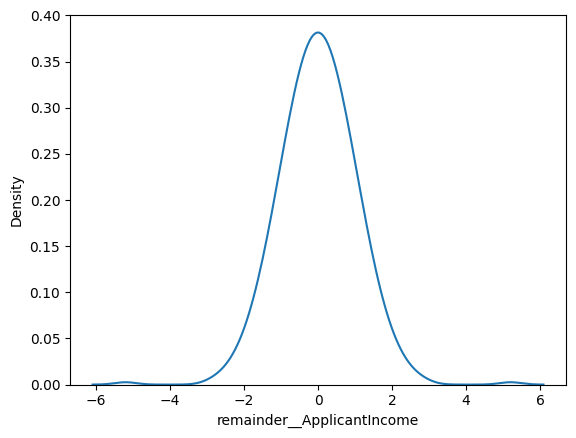

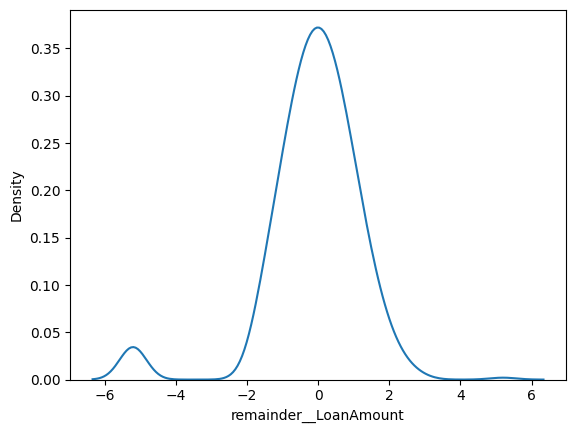

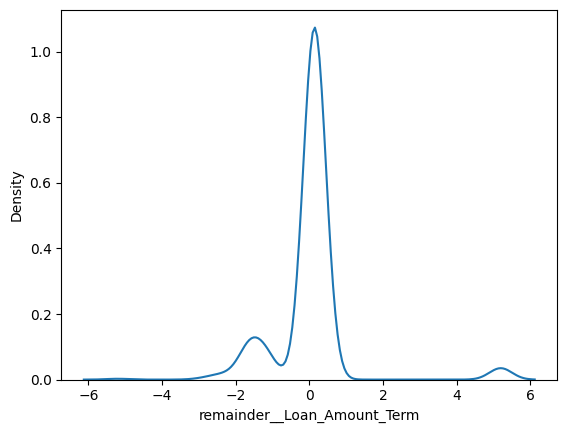

In [ ]:
columns = ['remainder__ApplicantIncome','remainder__LoanAmount','remainder__Loan_Amount_Term']
for i in columns:
   sns.kdeplot(df_transformed[i])
   plt.show()

In [ ]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   t1__Gender_Male                        521 non-null    float64
 1   t1__Married_Yes                        521 non-null    float64
 2   t1__Self_Employed_Yes                  521 non-null    float64
 3   t2__Property_Area                      521 non-null    float64
 4   t2__Education                          521 non-null    float64
 5   remainder__Dependents                  521 non-null    float64
 6   remainder__ApplicantIncome             521 non-null    float64
 7   remainder__CoapplicantIncome           521 non-null    float64
 8   remainder__LoanAmount                  521 non-null    float64
 9   remainder__Loan_Amount_Term            521 non-null    float64
 10  remainder__Credit_History              521 non-null    float64
 11  remain

In [ ]:
df_transformedd=df_transformed.drop(['remainder__CoapplicantIncome','remainder__ApplicantIncome','remainder__Loan_Amount_Term','remainder__Total_Income','remainder__binned'],axis =1)
# df_transformedd = df_transformed.drop(['remainder__Total_Income'	,'remainder__binned'	,'remainder__Loan_Amount_Term'],axis =1)
df_transformedd

,t1__Gender_Male,t1__Married_Yes,t1__Self_Employed_Yes,t2__Property_Area,t2__Education,remainder__Dependents,remainder__LoanAmount,remainder__Credit_History,remainder__Loan_Status,remainder__binned_Applicants_Income,remainder__binned_coapplicants_Income,remainder__binned_loan_amount
0,1.0,0.0,0.0,2.0,1.0,0.0,0.012051,1.0,1.0,4.0,0.0,5.0
1,1.0,1.0,0.0,0.0,1.0,1.0,0.079621,1.0,0.0,4.0,2.0,5.0
2,1.0,1.0,1.0,2.0,1.0,0.0,-1.281552,1.0,1.0,3.0,0.0,5.0
3,1.0,1.0,0.0,2.0,0.0,0.0,-0.118377,1.0,1.0,3.0,3.0,5.0
4,1.0,0.0,0.0,2.0,1.0,0.0,0.393120,1.0,1.0,4.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
516,0.0,1.0,0.0,1.0,1.0,2.0,-0.295898,1.0,1.0,2.0,2.0,6.0
517,1.0,1.0,0.0,1.0,0.0,0.0,-0.036161,0.0,0.0,3.0,2.0,5.0
518,1.0,0.0,0.0,1.0,1.0,0.0,0.949615,1.0,0.0,4.0,2.0,5.0
519,0.0,0.0,0.0,0.0,0.0,0.0,-0.771544,1.0,0.0,3.0,0.0,5.0


In [ ]:
df_transformedd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   t1__Gender_Male                        521 non-null    float64
 1   t1__Married_Yes                        521 non-null    float64
 2   t1__Self_Employed_Yes                  521 non-null    float64
 3   t2__Property_Area                      521 non-null    float64
 4   t2__Education                          521 non-null    float64
 5   remainder__Dependents                  521 non-null    float64
 6   remainder__LoanAmount                  521 non-null    float64
 7   remainder__Credit_History              521 non-null    float64
 8   remainder__Loan_Status                 521 non-null    float64
 9   remainder__binned_Applicants_Income    521 non-null    float64
 10  remainder__binned_coapplicants_Income  521 non-null    float64
 11  remain

#### Splitting the dataset into test train and split before data preprocessing to avoid data leakage 

In [ ]:
from sklearn.model_selection import train_test_split
X = df_transformedd.drop('remainder__Loan_Status', axis=1)
y = df_transformedd['remainder__Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)


## Model:

#### Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def result(y_pred,y_test):
  confusionmatrix = confusion_matrix(y_pred, y_test)
  print(confusionmatrix)

  print('Accuracy:', accuracy_score(y_pred, y_test))
  print('Precision:', precision_score(y_pred, y_test))
  print('Recall:', recall_score(y_pred, y_test))
  print('F1 Score:', f1_score(y_pred, y_test))

  disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix)
  disp.plot()

0.819047619047619
              precision    recall  f1-score   support

         0.0       1.00      0.47      0.64        36
         1.0       0.78      1.00      0.88        69

    accuracy                           0.82       105
   macro avg       0.89      0.74      0.76       105
weighted avg       0.86      0.82      0.80       105

Logistic Regression
[[17 19]
 [ 0 69]]
Accuracy: 0.819047619047619
Precision: 0.7840909090909091
Recall: 1.0
F1 Score: 0.8789808917197451
None


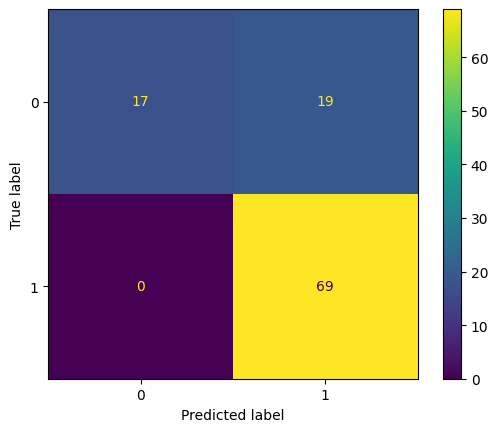

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
prediction_logreg=logreg.predict(X_test)
print(accuracy_score(y_test,prediction_logreg))
print(classification_report(y_test,prediction_logreg))
print('Logistic Regression')
print(result(y_test,prediction_logreg))

#### Random Forest Classifier 

In [ ]:
from uuid import RFC_4122
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rfc=RandomForestClassifier()

In [ ]:
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

In [ ]:
randomf_cv=RandomizedSearchCV(rfc,param_grid,cv=3,verbose=2,random_state=42)
randomf_cv.fit(X_train,y_train)

best_random=randomf_cv.best_estimator_
prediction_cv=best_random.predict(X_test)
print(accuracy_score(y_test,prediction_cv))
print(classification_report(y_test,prediction_cv))
confusionmatrix = confusion_matrix(y_test, prediction_cv)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.5s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   2.9s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=37, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=37, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=37, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   1.4s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.0s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.0s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.5s
[CV] END max_depth=82, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END max_depth=82, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END max_depth=82, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.2s
[CV] END max_depth=46, max_fe

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.7s
0.8095238095238095
              precision    recall  f1-score   support

         0.0       0.94      0.47      0.63        36
         1.0       0.78      0.99      0.87        69

    accuracy                           0.81       105
   macro avg       0.86      0.73      0.75       105
weighted avg       0.84      0.81      0.79       105



RANDOM FOREST  CLASSIFIER
[[17 19]
 [ 1 68]]
Accuracy: 0.8095238095238095
Precision: 0.7816091954022989
Recall: 0.9855072463768116
F1 Score: 0.8717948717948718
None


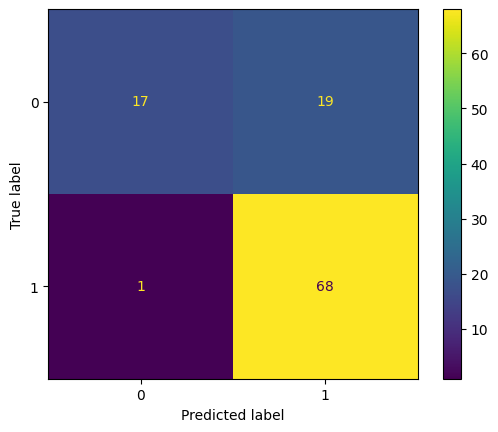

In [ ]:

print('RANDOM FOREST  CLASSIFIER') 
print(result(y_test,prediction_cv))


#### Decision Tree Classifier 

Decision Tree
[[20 12]
 [16 57]]
Accuracy: 0.7333333333333333
Precision: 0.8260869565217391
Recall: 0.7808219178082192
F1 Score: 0.8028169014084506
None


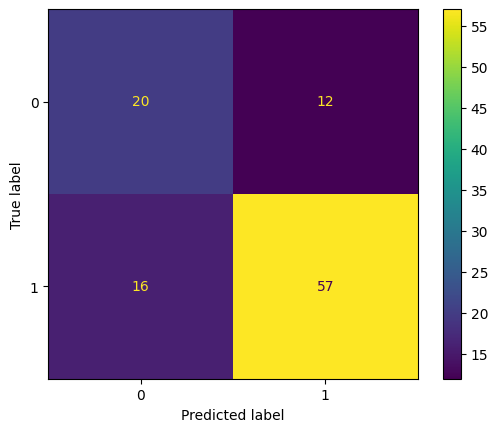

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print('Decision Tree') 
confusionmatrix = confusion_matrix(y_pred_dt, y_test)
print(result(y_pred_dt,y_test))

#### Gradient Boost Classifier 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2']
}
gbc = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameter values
best_params = grid_search.best_params_
print("Best parameters:", best_params)


Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}


Gradient Boosting Classifier
[[17  0]
 [19 69]]
Accuracy: 0.819047619047619
Precision: 1.0
Recall: 0.7840909090909091
F1 Score: 0.8789808917197451
None


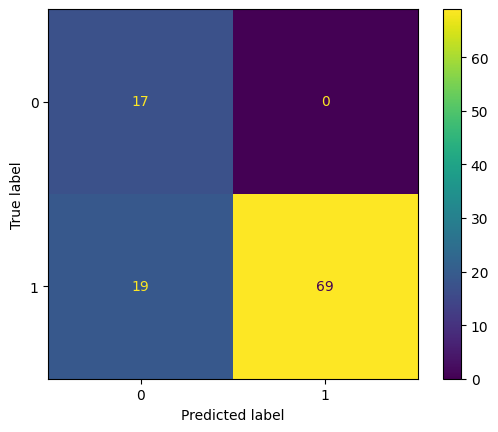

In [ ]:
gbc = GradientBoostingClassifier(**best_params)

# Fit the model on the training data
gbc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gcb = gbc.predict(X_test)

print('Gradient Boosting Classifier') 
print(result(y_pred_gcb,y_test))

#### KNN Classifier 

K Nearest Neighbors Classifier
[[ 9  7]
 [27 62]]
Accuracy: 0.6761904761904762
Precision: 0.8985507246376812
Recall: 0.6966292134831461
F1 Score: 0.7848101265822786
None


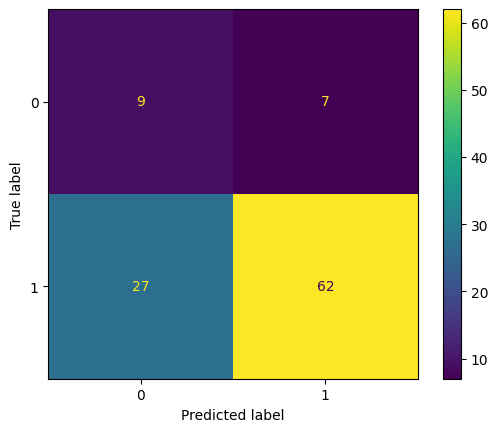

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print('K Nearest Neighbors Classifier')
print(result(y_pred_knn,y_test))

#### NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

Naive Bayes CLassifier
[[17  0]
 [19 69]]
Accuracy: 0.819047619047619
Precision: 1.0
Recall: 0.7840909090909091
F1 Score: 0.8789808917197451
None


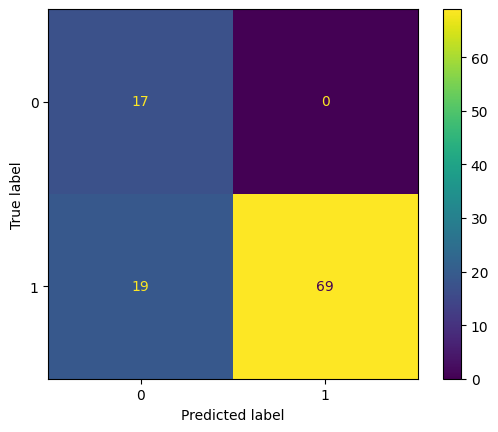

In [ ]:
print('Naive Bayes CLassifier') 
print(result(y_pred_gnb,y_test))

#### SVM CLASSIFIER 

Support Vector Machine Classifier
[[17  0]
 [19 69]]
Accuracy: 0.819047619047619
Precision: 1.0
Recall: 0.7840909090909091
F1 Score: 0.8789808917197451
None


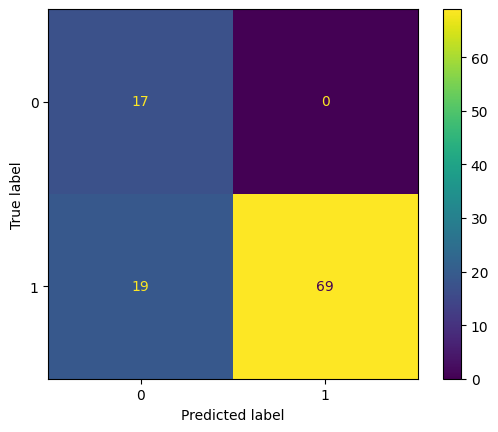

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine Classifier")
print(result(y_pred_svm,y_test))


#### XGBoost Classifier 

XG Boost classifier
[[21 11]
 [15 58]]
Accuracy: 0.7523809523809524
Precision: 0.8405797101449275
Recall: 0.7945205479452054
F1 Score: 0.8169014084507042
None


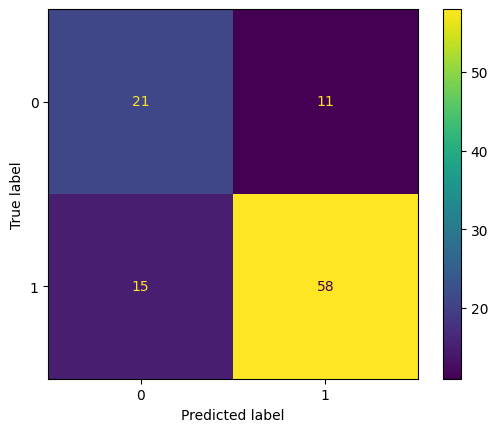

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print("XG Boost classifier")
print(result(y_pred_xgb,y_test))


#### ADA Boost

XG Boost classifier
[[20  6]
 [16 63]]
Accuracy: 0.7904761904761904
Precision: 0.9130434782608695
Recall: 0.7974683544303798
F1 Score: 0.8513513513513514
None


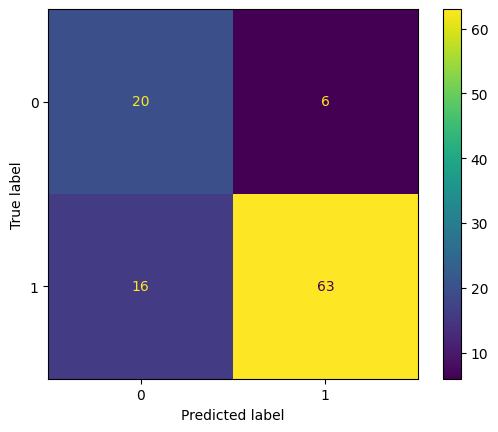

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
adb.fit(X_train,y_train)
y_pred_adb = adb.predict(X_test)
print("XG Boost classifier")
print(result(y_pred_adb,y_test))

#### Result 

In [ ]:
import pandas as pd

# Create a dictionary with your results
results = {'Model': ['XGBoost', 'RANDOM FOREST', 'LOGISTIC REGRESSION', 'NAIVE BAYES','SVM','KNN','ADABOOST','DECISION TREE','GRADIENT BOOST'],
           'Accuracy': [0.7523809,0.80952380 ,0.819047619 ,0.8190476190,0.81904761,0.676190476, 0.790476190,0.704761904,0.81904761],
           'Precision': [0.84057971, 0.7816091, 0.784090909,1.0,1.0,0.898550724,0.913043478,0.768115942,1.0],
           'Recall': [0.794520547, 0.98550724,1.0,0.784090909,0.784090909,0.696629213,0.7974683544,0.7794117647,0.784090909],
           'F1 Score':[0.81690140,0.871794878,0.87898089,0.87898089,0.878980891,0.784810126,0.8513513513,0.7737226277,0.87898089]}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(results)

# Apply formatting to the DataFrame using .style method
df.style.format({'Accuracy': '{:.2%}', 'Precision': '{:.2%}', 'Recall': '{:.2%}','F1 Score':'{:.2%}'})

,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost,75.24%,84.06%,79.45%,81.69%
1,RANDOM FOREST,80.95%,78.16%,98.55%,87.18%
2,LOGISTIC REGRESSION,81.90%,78.41%,100.00%,87.90%
3,NAIVE BAYES,81.90%,100.00%,78.41%,87.90%
4,SVM,81.90%,100.00%,78.41%,87.90%
5,KNN,67.62%,89.86%,69.66%,78.48%
6,ADABOOST,79.05%,91.30%,79.75%,85.14%
7,DECISION TREE,70.48%,76.81%,77.94%,77.37%
8,GRADIENT BOOST,81.90%,100.00%,78.41%,87.90%


#### Best Model According to ROC-AUC CURVE 

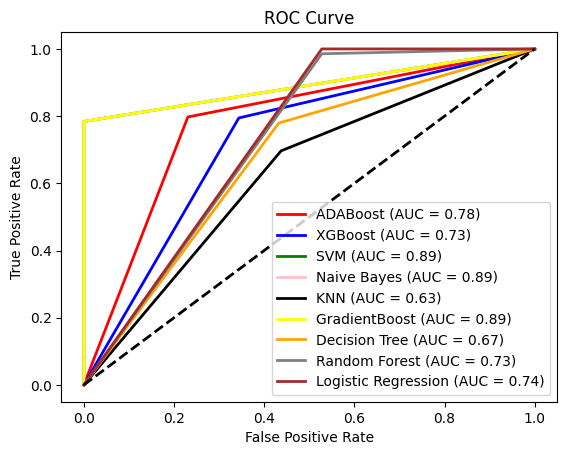

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


fpr1, tpr1, _ = roc_curve(y_pred_adb,y_test)
fpr2, tpr2, _ = roc_curve(y_pred_xgb,y_test)
fpr3, tpr3, _ = roc_curve(y_pred_svm,y_test)
fpr4, tpr4, _ = roc_curve(y_pred_gnb,y_test)
fpr5, tpr5, _ = roc_curve(y_pred_knn,y_test)
fpr6, tpr6, _ = roc_curve(y_pred_gcb,y_test)
fpr7, tpr7, _ = roc_curve(y_pred_dt,y_test)
fpr8, tpr8, _ = roc_curve(y_test, prediction_cv)
fpr9, tpr9, _ = roc_curve(y_test,prediction_logreg)

roc_auc1 = roc_auc_score(y_pred_adb,y_test)
roc_auc2 = roc_auc_score(y_pred_xgb,y_test)
roc_auc3 = roc_auc_score(y_pred_svm,y_test)
roc_auc4 = roc_auc_score(y_pred_gnb,y_test)
roc_auc5 = roc_auc_score(y_pred_knn,y_test)
roc_auc6 = roc_auc_score(y_pred_gcb,y_test)
roc_auc7 = roc_auc_score(y_pred_dt,y_test)
roc_auc8 = roc_auc_score(y_test, prediction_cv)
roc_auc9 = roc_auc_score(y_test,prediction_logreg)

plt.plot(fpr1, tpr1, color='red', lw=2, label='ADABoost (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw=2, label='SVM (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='pink', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, color='black', lw=2, label='KNN (AUC = %0.2f)' % roc_auc5)
plt.plot(fpr6, tpr6, color='yellow', lw=2, label='GradientBoost (AUC = %0.2f)' % roc_auc6)
plt.plot(fpr7, tpr7, color='orange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc7)
plt.plot(fpr8, tpr8, color='grey', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc8)
plt.plot(fpr9, tpr9, color='brown', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc9)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc="lower right")
plt.show()







#### OBSERVATIONS:
- ACCORDING TO ROC CURVE THE MODELS NAMELY SVM,NAIVE BAYES,GRADIENT BOOST HAS THE HIGHEST AUC SCORE OF 89% 
- FROM THE PRECISION RECALL AND F1 SCORE OF THE MODELS WE OBSERVE THAT THE GRADIENT BOOST MODEL HAS THE BEST PERFORMANCE.
- FROM ABOVE TWO METHODOLOGIES WE CONCLUDE THAT THE GRADIENT BOOSTING WILL GIVE THE BEST RESULT HENCE CAN BE USED FOR PREDICTION.


#Model for prediction on test dataset 

In [ ]:
test = pd.read_excel("/content/drive/MyDrive/consumer creditworthiness test data.xlsx")

In [ ]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,788264,Male,No,0,Graduate,No,562500,0,110000,360,1.0,Semiurban
1,431937,Male,Yes,3+,Graduate,Yes,1277325,320400,200000,360,1.0,Rural
2,425437,Male,Yes,2,Graduate,Yes,1788300,1612350,960000,360,1.0,Rural
3,938101,Male,No,0,Graduate,No,1053000,469575,0,360,1.0,Semiurban
4,180559,Male,Yes,2,Graduate,Yes,3937500,0,800000,360,1.0,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...
88,745846,Female,No,0,Graduate,No,652500,0,142000,360,1.0,Rural
89,632570,Male,Yes,3+,Graduate,No,923850,0,80000,180,1.0,Rural
90,320705,Male,Yes,1,Graduate,No,1816200,54000,506000,360,1.0,Urban
91,333950,Male,Yes,2,Graduate,No,1706175,0,374000,360,1.0,Urban


#### Data Preprocessing on test dataset 

In [ ]:
test.isnull().sum()

Loan_ID              0
Gender               3
Married              0
Dependents           2
Education            0
Self_Employed        5
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       7
Property_Area        0
dtype: int64

#### Simple Imputation for missing value in Test Dataset and dropping loan id column 

In [ ]:
df_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(test[mean_columns]), columns=mean_columns).reset_index(drop=True)
df_mode_imputed = pd.DataFrame(mode_imputer.fit_transform(test[mode_columns]), columns=mode_columns).reset_index(drop=True)
df_remainder = test[['Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Property_Area']].reset_index(drop=True)
df_imputed = pd.concat([df_mean_imputed, df_mode_imputed, df_remainder], axis=1)
data_test = pd.DataFrame(df_imputed)
data_test

,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Self_Employed,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area
0,360.0,1.0,Male,No,0,No,Graduate,562500,0,110000,Semiurban
1,360.0,1.0,Male,Yes,3+,Yes,Graduate,1277325,320400,200000,Rural
2,360.0,1.0,Male,Yes,2,Yes,Graduate,1788300,1612350,960000,Rural
3,360.0,1.0,Male,No,0,No,Graduate,1053000,469575,0,Semiurban
4,360.0,1.0,Male,Yes,2,Yes,Graduate,3937500,0,800000,Rural
...,...,...,...,...,...,...,...,...,...,...,...
88,360.0,1.0,Female,No,0,No,Graduate,652500,0,142000,Rural
89,180.0,1.0,Male,Yes,3+,No,Graduate,923850,0,80000,Rural
90,360.0,1.0,Male,Yes,1,No,Graduate,1816200,54000,506000,Urban
91,360.0,1.0,Male,Yes,2,No,Graduate,1706175,0,374000,Urban


#### Reindexing the column of Dataset

In [ ]:

data_test = data_test.reindex(columns = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])
data_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,562500,0,110000,360.0,1.0,Semiurban
1,Male,Yes,3+,Graduate,Yes,1277325,320400,200000,360.0,1.0,Rural
2,Male,Yes,2,Graduate,Yes,1788300,1612350,960000,360.0,1.0,Rural
3,Male,No,0,Graduate,No,1053000,469575,0,360.0,1.0,Semiurban
4,Male,Yes,2,Graduate,Yes,3937500,0,800000,360.0,1.0,Rural
...,...,...,...,...,...,...,...,...,...,...,...
88,Female,No,0,Graduate,No,652500,0,142000,360.0,1.0,Rural
89,Male,Yes,3+,Graduate,No,923850,0,80000,180.0,1.0,Rural
90,Male,Yes,1,Graduate,No,1816200,54000,506000,360.0,1.0,Urban
91,Male,Yes,2,Graduate,No,1706175,0,374000,360.0,1.0,Urban


#### Binning the applicants income and copplicants income 

In [ ]:
bins = [0, 100000, 500000, 1000000, 2000000, 3000000,10000001000000]
data_test['binned_Applicants_Income'] = np.searchsorted(bins ,data_test['ApplicantIncome'].values)
data_test['binned_coapplicants_Income'] = np.searchsorted(bins ,data_test['CoapplicantIncome'].values)

#### Binning Loan Amount 

In [ ]:
bins = [0,121,181,241,300,361,1000000]
data_test['binned_loan_amount'] = np.searchsorted(bins ,data_test['Loan_Amount_Term'].values)

#### Removing '+' Sign from the dependents column 

In [ ]:
data_test['Dependents']= data_test.Dependents.apply(lambda x:x.replace('+','') if '+' in str(x) else x)
data_test['Dependents']= data_test['Dependents'].apply(lambda x:int(x) if pd.notna(x) else x)

#### Applying transformer to apply ordinal and one hot encoding to columns 

In [ ]:
df2 = transformer.fit_transform(data_test)
feature_names = transformer.get_feature_names_out()
df_transformed_test = pd.DataFrame(df2, columns=feature_names)
df_transformed_test

,t1__Gender_Male,t1__Married_Yes,t1__Self_Employed_Yes,t2__Property_Area,t2__Education,remainder__Dependents,remainder__ApplicantIncome,remainder__CoapplicantIncome,remainder__LoanAmount,remainder__Loan_Amount_Term,remainder__Credit_History,remainder__binned_Applicants_Income,remainder__binned_coapplicants_Income,remainder__binned_loan_amount
0,1.0,0.0,0.0,1.0,1.0,0.0,562500.0,0.0,110000.0,360.0,1.0,3.0,0.0,5.0
1,1.0,1.0,1.0,0.0,1.0,3.0,1277325.0,320400.0,200000.0,360.0,1.0,4.0,2.0,5.0
2,1.0,1.0,1.0,0.0,1.0,2.0,1788300.0,1612350.0,960000.0,360.0,1.0,4.0,4.0,5.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1053000.0,469575.0,0.0,360.0,1.0,4.0,2.0,5.0
4,1.0,1.0,1.0,0.0,1.0,2.0,3937500.0,0.0,800000.0,360.0,1.0,6.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,0.0,0.0,0.0,1.0,0.0,652500.0,0.0,142000.0,360.0,1.0,3.0,0.0,5.0
89,1.0,1.0,0.0,0.0,1.0,3.0,923850.0,0.0,80000.0,180.0,1.0,3.0,0.0,2.0
90,1.0,1.0,0.0,2.0,1.0,1.0,1816200.0,54000.0,506000.0,360.0,1.0,4.0,1.0,5.0
91,1.0,1.0,0.0,2.0,1.0,2.0,1706175.0,0.0,374000.0,360.0,1.0,4.0,0.0,5.0


#### Scaling the dataset using Quantile transformer 

In [ ]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
quantile_transformer.fit(df_transformed_test[['remainder__ApplicantIncome','remainder__LoanAmount','remainder__Loan_Amount_Term']])
transformed_data_test = quantile_transformer.transform(df_transformed_test[['remainder__ApplicantIncome','remainder__LoanAmount'	,'remainder__Loan_Amount_Term']])
df_transformed_test[['remainder__ApplicantIncome','remainder__LoanAmount','remainder__Loan_Amount_Term']]=pd.DataFrame(transformed_data_test,columns = ['remainder__ApplicantIncome','remainder__LoanAmount','remainder__Loan_Amount_Term'])
df_transformed_test

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (93). n_quantiles is set to n_samples.
  warnings.warn(


,t1__Gender_Male,t1__Married_Yes,t1__Self_Employed_Yes,t2__Property_Area,t2__Education,remainder__Dependents,remainder__ApplicantIncome,remainder__CoapplicantIncome,remainder__LoanAmount,remainder__Loan_Amount_Term,remainder__Credit_History,remainder__binned_Applicants_Income,remainder__binned_coapplicants_Income,remainder__binned_loan_amount
0,1.0,0.0,0.0,1.0,1.0,0.0,-1.074478,0.0,-1.359737,0.150418,1.0,3.0,0.0,5.0
1,1.0,1.0,1.0,0.0,1.0,3.0,0.543252,320400.0,-0.657484,0.150418,1.0,4.0,2.0,5.0
2,1.0,1.0,1.0,0.0,1.0,2.0,1.124338,1612350.0,2.019086,0.150418,1.0,4.0,4.0,5.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.361947,469575.0,-5.199338,0.150418,1.0,4.0,2.0,5.0
4,1.0,1.0,1.0,0.0,1.0,2.0,2.019086,0.0,1.843765,0.150418,1.0,6.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,0.0,0.0,0.0,1.0,0.0,-0.674490,0.0,-1.027154,0.150418,1.0,3.0,0.0,5.0
89,1.0,1.0,0.0,0.0,1.0,3.0,0.164211,0.0,-1.431895,-1.470951,1.0,3.0,0.0,2.0
90,1.0,1.0,0.0,2.0,1.0,1.0,1.177163,54000.0,1.177163,0.150418,1.0,4.0,1.0,5.0
91,1.0,1.0,0.0,2.0,1.0,2.0,1.074478,0.0,0.818550,0.150418,1.0,4.0,0.0,5.0


#### Dropping the continuous applicants ,copplicants and loan amount term columns 

In [ ]:
df_test=df_transformed_test.drop(['remainder__CoapplicantIncome','remainder__ApplicantIncome','remainder__Loan_Amount_Term'],axis =1)
df_test

,t1__Gender_Male,t1__Married_Yes,t1__Self_Employed_Yes,t2__Property_Area,t2__Education,remainder__Dependents,remainder__LoanAmount,remainder__Credit_History,remainder__binned_Applicants_Income,remainder__binned_coapplicants_Income,remainder__binned_loan_amount
0,1.0,0.0,0.0,1.0,1.0,0.0,-1.359737,1.0,3.0,0.0,5.0
1,1.0,1.0,1.0,0.0,1.0,3.0,-0.657484,1.0,4.0,2.0,5.0
2,1.0,1.0,1.0,0.0,1.0,2.0,2.019086,1.0,4.0,4.0,5.0
3,1.0,0.0,0.0,1.0,1.0,0.0,-5.199338,1.0,4.0,2.0,5.0
4,1.0,1.0,1.0,0.0,1.0,2.0,1.843765,1.0,6.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,0.0,0.0,0.0,1.0,0.0,-1.027154,1.0,3.0,0.0,5.0
89,1.0,1.0,0.0,0.0,1.0,3.0,-1.431895,1.0,3.0,0.0,2.0
90,1.0,1.0,0.0,2.0,1.0,1.0,1.177163,1.0,4.0,1.0,5.0
91,1.0,1.0,0.0,2.0,1.0,2.0,0.818550,1.0,4.0,0.0,5.0


#### Checking the null values in the columns 

In [ ]:
df_test.isnull().sum()

t1__Gender_Male                          0
t1__Married_Yes                          0
t1__Self_Employed_Yes                    0
t2__Property_Area                        0
t2__Education                            0
remainder__Dependents                    0
remainder__LoanAmount                    0
remainder__Credit_History                0
remainder__binned_Applicants_Income      0
remainder__binned_coapplicants_Income    0
remainder__binned_loan_amount            0
dtype: int64

#### Gradient Boosting 

In [246]:
y_test_gcb = gbc.predict(df_test)
unique_values, counts = np.unique(y_test_gcb, return_counts=True)
print(y_test_gcb)
print("***Value Counts In the Test Dataset***")
print(f"{int(unique_values[0])}   :   {counts[0]}")
print(f"{int(unique_values[1])}   :   {counts[1]}")

[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
***Value Counts In the Test Dataset***
0   :   17
1   :   76


#### Naive Bayes

In [247]:
y_test_gnb = gnb.predict(df_test)
unique_values, counts = np.unique(y_test_gnb, return_counts=True)
print(y_test_gnb)
print("***Value Counts In the Test Dataset***")
print(f"{int(unique_values[0])}   :   {counts[0]}")
print(f"{int(unique_values[1])}   :   {counts[1]}")

[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
***Value Counts In the Test Dataset***
0   :   17
1   :   76


#### SVM Classifier

In [248]:
y_test_svm = svm.predict(df_test)
unique_values, counts = np.unique(y_test_svm, return_counts=True)
print(y_test_svm)
print("***Value Counts In the Test Dataset***")
print(f"{int(unique_values[0])}   :   {counts[0]}")
print(f"{int(unique_values[1])}   :   {counts[1]}")

[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
***Value Counts In the Test Dataset***
0   :   16
1   :   77
